# Youtube 熱門流行影片統計

## YOUTUBE作為全世界的人們經常瀏覽的網站，有著豐富的資訊，也是現在每個人幾乎每天一定要瀏覽的網站，通過研究一些YOUTUBE的數據及分析，可以了解時下的流行趨勢。
### 資料來源: Kaggle
### 統計時間: 2017/11/14到2018/6/14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 此csv檔為2017/11/14到2018/6/14每日統計前200名左右的熱門影片

In [2]:
US = pd.read_csv('USvideos.csv')

### 檔案資訊

In [3]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
video_id                  200 non-null object
trending_date             200 non-null object
title                     200 non-null object
channel_title             200 non-null object
category_id               200 non-null int64
publish_time              200 non-null object
tags                      200 non-null object
views                     200 non-null int64
likes                     200 non-null int64
dislikes                  200 non-null int64
comment_count             200 non-null int64
thumbnail_link            200 non-null object
comments_disabled         200 non-null bool
ratings_disabled          200 non-null bool
video_error_or_removed    200 non-null bool
description               197 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 21.0+ KB


總共有16個column，我們只會使用其中幾個有數值得來討論。

### 檢查有無missing data

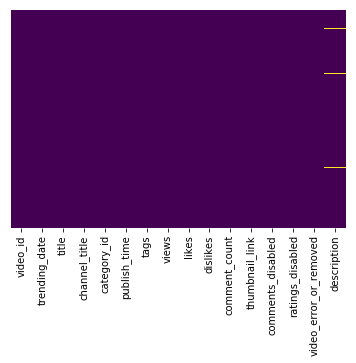

In [4]:
sns.heatmap(US.isnull(),yticklabels=False,cbar=False,cmap='viridis')

只有兩個column有missing data，不會影響到後面要討論的內容

### 上榜次數排名

In [5]:
US['title'].value_counts()

Thirty Seconds To Mars - Walk On Water (Official Music Video)                               1
FACE SURGERY WITH MAKEUP                                                                    1
Remy Ma - Wake Me Up (Audio) ft. Lil' Kim                                                   1
What Are Diminutives – and Why We Like Them                                                 1
Making South Korea’s Secret Sauce                                                           1
Could an Earthquake Destroy USA - Biggest Earthquakes Ever                                  1
Nickleback Lyrics: Real or Fake?                                                            1
P!nk - Barbies (Audio)                                                                      1
#VeteransDay: Thank You for Everything                                                      1
Edna's registered owner thought she was dead for 2 years!!!                                 1
I'm With Her - See You Around [Official Audio]              

1. * WE MADE OUR MOM CRY...HER DREAM CAME TRUE! (生活影片)
       * 30次
2. * Rooster Teeth Animated Adventures - Millie So Serious (娛樂短片)
   * Charlie Puth - BOY [Official Audio] (音樂)
   * The ULTIMATE $30,000 Gaming PC Setup (3C開箱)
   * Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures (電影預告)
       * 29次
3. * Cobra Kai Season 2 (Youtube原創影集)
   * Bohemian Rhapsody | Teaser Trailer [HD] | 20th Century FOX (電影預告)
   * 周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV (音樂)
   * The Deadliest Being on Planet Earth – The Bacteriophage (科普影片)
   * FORTNITE The Movie (Official Fake Trailer) (娛樂短片)
       * 28次

### 刪掉重複的，留下每支影片的第一次上榜紀錄，可得出實際影片數量為6455支

In [7]:
US_first=US.drop_duplicates(['title'],keep='first')

### 第一次進榜資訊

In [8]:
US_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6455 entries, 0 to 40766
Data columns (total 16 columns):
video_id                  6455 non-null object
trending_date             6455 non-null object
title                     6455 non-null object
channel_title             6455 non-null object
category_id               6455 non-null int64
publish_time              6455 non-null object
tags                      6455 non-null object
views                     6455 non-null int64
likes                     6455 non-null int64
dislikes                  6455 non-null int64
comment_count             6455 non-null int64
thumbnail_link            6455 non-null object
comments_disabled         6455 non-null bool
ratings_disabled          6455 non-null bool
video_error_or_removed    6455 non-null bool
description               6352 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 724.9+ KB


### 進榜第一天觀看次數排名

In [9]:
US_first.sort_values(by='views',ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
23824,-BQJo3vK8O8,18.15.03,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
28605,i0p1bmr0EmE,18.14.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
70,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
30750,u9Mv98Gr5pY,18.25.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03.000Z,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",27973210,850362,26541,96767,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...
4600,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
28624,U9BwWKXjVaI,18.14.04,Drake - Nice For What,DrakeVEVO,10,2018-04-07T02:46:31.000Z,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",24421448,641546,16517,42949,https://i.ytimg.com/vi/U9BwWKXjVaI/default.jpg,False,False,False,Music video by Drake performing Nice For What....
38161,1J76wN0TPI4,18.01.06,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,24,2018-05-30T07:51:32.000Z,"Sanju|""Official Trailer""|""sanju official trail...",23758250,587326,18799,43728,https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...


1. Maluma - El Préstamo (Official Video) (音樂)
    * views: 48,431,654次
2. BTS (방탄소년단) 'FAKE LOVE' Official MV (音樂)
    * views: 39,349,927次
3. TWICE What is Love? M/V (音樂)
    * views: 38,873,543次
4. Marvel Studios' Avengers: Infinity War Official Trailer (電影預告)
    * views: 37,736,281次
5. Ed Sheeran - Perfect (Official Music Video) (音樂)
    * views: 33,523,622次

### 最後一次進榜資訊

In [10]:
US_last=US.drop_duplicates(['title'],keep='last')

In [11]:
US_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6455 entries, 10 to 40948
Data columns (total 16 columns):
video_id                  6455 non-null object
trending_date             6455 non-null object
title                     6455 non-null object
channel_title             6455 non-null object
category_id               6455 non-null int64
publish_time              6455 non-null object
tags                      6455 non-null object
views                     6455 non-null int64
likes                     6455 non-null int64
dislikes                  6455 non-null int64
comment_count             6455 non-null int64
thumbnail_link            6455 non-null object
comments_disabled         6455 non-null bool
ratings_disabled          6455 non-null bool
video_error_or_removed    6455 non-null bool
description               6355 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 724.9+ KB


### 離榜前觀看次數排名

In [12]:
US_last.sort_values(by='views',ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
34747,M4ZoCHID9GI,18.14.05,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,10,2018-04-12T16:00:04.000Z,"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",122544931,1427436,40837,55320,https://i.ytimg.com/vi/M4ZoCHID9GI/default.jpg,False,False,False,Call Out My Name (Official Video)Taken from th...
2587,TyHvyGVs42U,17.26.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",102012605,2376636,117196,134224,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...
40869,xTlNMmZKwpA,18.14.06,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,10,2018-05-29T14:05:10.000Z,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",94254507,1816753,102474,101077,https://i.ytimg.com/vi/xTlNMmZKwpA/default.jpg,False,False,False,"Cardi B, Bad Bunny & J Balvin - I Like It from..."
4997,6ZfuNTqbHE8,17.08.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007,2625661,53709,350458,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
25947,-BQJo3vK8O8,18.25.03,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",87264467,815369,71494,35945,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...


1. Childish Gambino - This Is America (Official Video) (音樂)
    * views: 225,211,923次
2. YouTube Rewind: The Shape of 2017 | #YouTubeRewind (娛樂)
    * views: 149,376,127次
3. Ariana Grande - No Tears Left To Cry (音樂)
    * views: 148,689,896次
4. Becky G, Natti Natasha - Sin Pijama (Official Video) (音樂)
    * views: 139,334,502次
5. BTS (방탄소년단) 'FAKE LOVE' Official MV (音樂)
    * views: 123,010,920次

### 離榜前按讚次數排名

In [13]:
US_last.sort_values(by='likes',ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
3581,kTlv5_Bs8aw,17.01.12,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",36857298,2729292,47896,546100,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...
35080,p8npDG2ulKQ,18.16.05,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,10,2018-05-06T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",29741771,2700800,29341,371864,https://i.ytimg.com/vi/p8npDG2ulKQ/default.jpg,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...
22040,OK3GJ0WIQ8s,18.06.03,j-hope 'Daydream (백일몽)' MV,ibighit,10,2018-03-01T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",23416810,2672431,29088,477233,https://i.ytimg.com/vi/OK3GJ0WIQ8s/default.jpg,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...
4997,6ZfuNTqbHE8,17.08.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007,2625661,53709,350458,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
39814,aJOTlE1K90k,18.09.06,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,10,2018-05-31T04:00:00.000Z,"Maroon|""Girls""|""Like""|""You""|""Interscope""|""Reco...",66529577,2488565,43464,142410,https://i.ytimg.com/vi/aJOTlE1K90k/default.jpg,False,False,False,Girls Like You” is out now.http://smarturl.it/...
2587,TyHvyGVs42U,17.26.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",102012605,2376636,117196,134224,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...


1. BTS (방탄소년단) 'FAKE LOVE' Official MV (音樂)
    * 5,613,827次
2. Childish Gambino - This Is America (Official Video) (音樂)
    * 5,023,450次
3. Ariana Grande - No Tears Left To Cry (音樂)
    * 3,094,021次
4. YouTube Rewind: The Shape of 2017 | #YouTubeRewind (娛樂)
    * 3,093,544次
5. BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV (音樂)
    * 2,729,292次

### 觀看類型排名

In [14]:
US_last['category_id'].value_counts()

24    1644
10     821
26     601
23     548
25     510
22     502
17     455
28     391
1      322
27     257
15     144
20     104
2       73
19      64
29      15
43       4
Name: category_id, dtype: int64

1. 娛樂(代號24)>>1,644支
2. 音樂(代號10)>>821支
3. 實用教學(代號26)>>601支
4. 搞笑影片、脫口秀(代號23)>>548支
5. 新聞(代號25)>>510支

### 最常上榜的創作者(頻道)

In [15]:
US['channel_title'].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       193
TheEllenShow                              193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
First We Feast                            153
HellthyJunkFood                   

1. * ESPN (體育頻道)
    * 203次
2. * The Tonight Show Starring Jimmy Fallon (脫口秀)
    * 197次
3. * Netflix (影集)
   * TheEllenShow (脫口秀)
   * Vox (時事新聞)
    * 193次

## 找出資料間的相關性

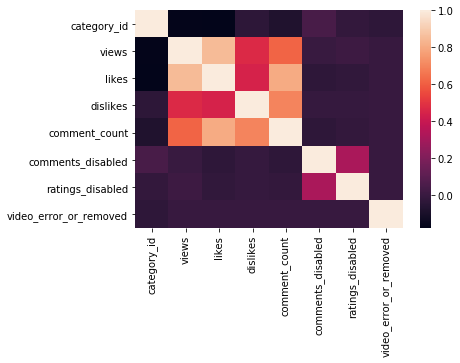

In [16]:
sns.heatmap(US.corr())

觀看次數跟喜歡次數和留言數相關性較高，跟不喜歡次數相關性稍微低一點。

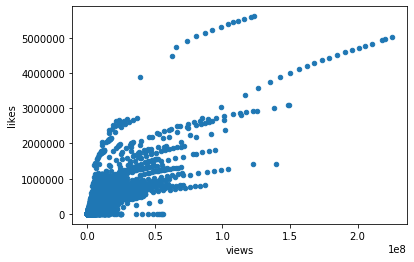

In [32]:
US.plot.scatter(x='views',y='likes')

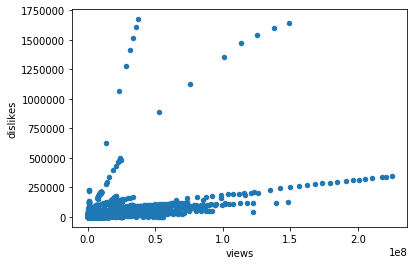

In [33]:
US.plot.scatter(x='views',y='dislikes')

由上面兩張分布圖也可得知觀看次數與喜不喜歡之間的關係

### 使用LinearRegression，以按讚數當y，觀看次數、不喜歡數、留言數當X

In [17]:
X = US[['views', 'dislikes', 'comment_count']]
y = US['likes']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=87)

In [19]:
from sklearn.linear_model import LinearRegression
uslr = LinearRegression()

In [20]:
uslr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(uslr.intercept_)

5616.109183894834


In [22]:
coeff_df = pd.DataFrame(uslr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
views,0.018823
dislikes,-2.195683
comment_count,3.790250


按讚數=5616.11+0.018823(觀看次數)-2.195683(不喜歡數)+3.79025(留言數)

## Test the model

In [23]:
predictions = uslr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

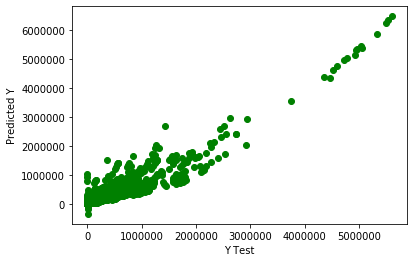

In [35]:
plt.scatter(y_test,predictions,color="g")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
print('R-square: %.2f' % r2_score(y_test,predictions))

R-square: 0.89


按讚次數有0.89的部分可以用觀看次數、不喜歡次數、留言數來解釋

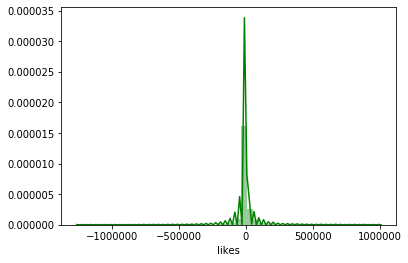

In [34]:
sns.distplot((y_test-predictions),bins=50,color="g")

In [ ]:
sns.distplot((y_test-predictions),bins=50)

有超過175個影片的不喜歡數在0-10000之間 極少影片超過40000次

從此分布圖來看 觀看數越多 讚數留言數跟討厭數也會隨之增加

可以從這張圖看出 觀看次數越多 喜歡次數也越多